In [1]:
# reload P1_definitions module before executing code. All the object imported from P1_definitions are updated.
%load_ext autoreload
%autoreload 2

In [2]:
# Importing various packages
import numpy as np
import matplotlib.pyplot as plt

# For import and analyse the dataset
import pandas as pd
import seaborn as sns

# Scaling
from sklearn.preprocessing import StandardScaler

# Logistic analysis 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Our code for GD, SGD in logistic regression
from P1_definitions import GD_LogReg, SGD_LogReg, Prediction_LogReg 

# Performance measurements
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Reproducibility of the results
from random import random, seed


********************* Run the following 3 code boxes to import, analyse and process the dataset. ********************* 

In [3]:
""" Use the functionalities of Pandas to import the data and print a summary of it """

# Import data
data = pd.read_csv("/Users/chiaragiraudo/Documents/Project1/data.csv")
# Print a summary of the data 
data.info()  
# Give a statistical description of the data: central tendency, dispersion and shape of a dataset’s distribution,... (NaN values excluded)       
data.describe()    
# Printing the first n rows
data.head(569)     # Return (n=569) rows. If head(n) returns the first n rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


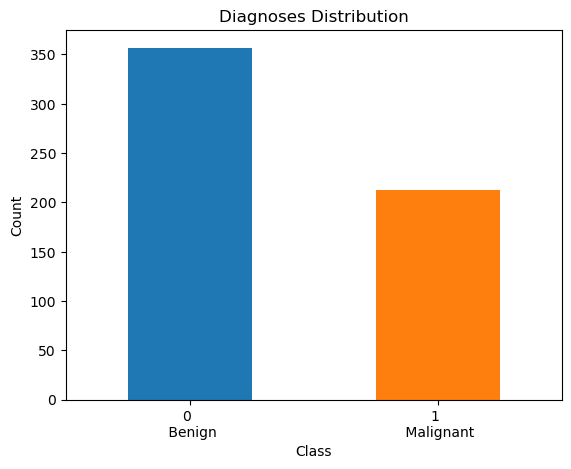

In [4]:
""" Pre-processing the data and visualization of the class distribution """

# Drop ID and empty column (Unnamed: 32)
data.drop(['Unnamed: 32', "id"], axis=1, inplace=True)      # axis = 1 --> drop label from column
# Turn target variable into 1s and 0s: M (malignant) --> 1, B(benign) --> 0
data.diagnosis =[1 if value == "M" else 0 for value in data.diagnosis]

# Plot the Diagnoses Distribution
colors = ['#1f77b4', '#ff7f0e']
plot = data['diagnosis'].value_counts().plot(kind='bar',  color=colors, title="Diagnoses Distribution")
# Change the labels
plot.set_xticklabels(['0 \n Benign', '1 \n Malignant'], rotation=0)
plot.set_xlabel("Class")
plot.set_ylabel("Count")
plot.tick_params(axis='x', rotation=0)
fig = plot.get_figure()


************************************************************************ MODEL ************************************************************************

In [5]:
""" Preparing the model: separate the target variable from the predictors matrix, 
                         splitting the data into train and test and
                         standardize the data """

y = data["diagnosis"]       # target variable
X = data.drop(["diagnosis"], axis=1)    # predictors

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=19)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)      #numpy array with normalized data
X_test_scaled = scaler.transform(X_test)  

************************************************************************ MODEL FROM SCIKIT LEARN ************************************************************************

train Accuracy: 0.9874 test Accuracy: 0.9591
Performance measurements on the test set
Confusion Matrix:


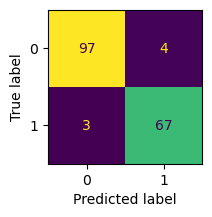

Negative class (Benign) support = 101 
Positive class (Malignant) support = 70
Performance of the model on the test set, focusing on its ability to correctly classify the positive class (malignant)
Precision = 0.9437 Recall = 0.9571
F1 score = 0.9504


In [6]:
''' Create logistic regression model.
    From Scikit learn we use LogisticRegression: 'penalty = ...' : adding a penalty term. None --> no penalty term;
                                                                   'l2' --> L2 penalty term (default choice)
                                                                   ...
                                                 'fit_intercept = ...' : False --> no intercept added
                                                                         True --> intercept added (default choice)
                                                 'solver= ...' : defining the solver. 'sag' = Stochastic Average Gradient descent, support penalties: 'l2', None;
                                                                                      'lbfgs' = optimization algorithm that approximates the Broyden-Fletcher-Goldfarb-Shanno algorithm (quasi-Newton methods), support penalties: 'l2', None;
                                                                                      ...
    Obs: With 'sag', fast convergence is only guaranteed on features with approximately the same scale. 'lbfgs' should be better than 'sag'
'''
# Defining y_train and y_test for SciKit learn 
Skl_y_train = y_train
Skl_y_test = y_test

lr = LogisticRegression(penalty = 'l2' , solver= 'lbfgs', max_iter=100000, random_state = 42) # penalty = None or 'l2' // solver = 'sag' or 'lbfgs'

# Train the model on the training data
lr.fit(X_train_scaled, Skl_y_train)

# Predict the target variable on the test data
Skl_y_pred = lr.predict(X_test_scaled)
train_Skl_y_pred = lr.predict(X_train_scaled)

# Evaluate the performance of the model
Skl_test_accuracy = accuracy_score(Skl_y_test, Skl_y_pred)
Skl_train_accuracy = accuracy_score(Skl_y_train, train_Skl_y_pred)
print(f'train Accuracy: {Skl_train_accuracy:.4f}', f'test Accuracy: {Skl_test_accuracy:.4f}')
print('Performance measurements on the test set')
print('Confusion Matrix:')
fig, ax = plt.subplots(figsize=(2, 2))
ConfusionMatrixDisplay.from_predictions(Skl_y_test, Skl_y_pred, ax=ax, colorbar=False)
plt.show()
Skl_cm = confusion_matrix(Skl_y_test, Skl_y_pred)
print('Negative class (Benign) support = {} \n'.format(Skl_cm[0,0] + Skl_cm[0,1]) + 'Positive class (Malignant) support = {}'.format(Skl_cm[1,0] + Skl_cm[1,1]))
print('Performance of the model on the test set, focusing on its ability to correctly classify the positive class (malignant)')
print('Precision = {:.4f}'.format(precision_score(Skl_y_test,Skl_y_pred)), 'Recall = {:.4f}'.format(recall_score(Skl_y_test,Skl_y_pred)))
print('F1 score = {:.4f}'.format(f1_score(Skl_y_test,Skl_y_pred)))

# If interested also in the performance of the negative class
#print(classification_report(Skl_y_test,Skl_y_pred))

********** Execute this box to obtain the intercept in the GD or SGD analysis **********

In [7]:
""" Execute this box to obtain the intercept in the GD or SGD analysis """

# Transform y_train and y_test from (n,) to (n,1) 
GD_y_train = y_train.values.reshape(len(y_train), 1)
GD_y_test = y_test.values.reshape(len(y_test), 1)

# Compute the train and test design matrixes considering the intercept, i.e add a column of 1 
n_train = X_train.shape[0] 
n_test = X_test.shape[0]
X_train_scaled_intercept = np.hstack((np.ones((n_train,1)),X_train_scaled))
X_test_scaled_intercept = np.hstack((np.ones((n_test,1)),X_test_scaled))

# Set hyperparameters
n = X_train_scaled_intercept.shape[0]               # number of samples
n_features = X_train_scaled_intercept.shape[1]      # number of features

************************************************************************ MODEL WITH GRADIENT DESCENT ************************************************************************

 ************************************* learning rate = 0.0001 and regularization term = 0.0 *************************************
train Accuracy: 0.8568 test Accuracy: 0.8830
Performance measurements on the test set
Confusion Matrix:


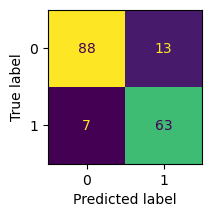

Negative class (Benign) support = 101 
Positive class (Malignant) support = 70
Performance of the model on the test set, focusing on its ability to correctly classify the positive class (malignant)
Precision = 0.8289 Recall = 0.9000
F1 score = 0.8630
 ************************************* learning rate = 0.001 and regularization term = 0.0 *************************************
train Accuracy: 0.9673 test Accuracy: 0.9591
Performance measurements on the test set
Confusion Matrix:


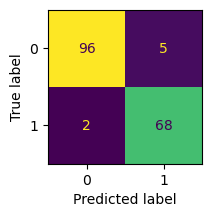

Negative class (Benign) support = 101 
Positive class (Malignant) support = 70
Performance of the model on the test set, focusing on its ability to correctly classify the positive class (malignant)
Precision = 0.9315 Recall = 0.9714
F1 score = 0.9510
 ************************************* learning rate = 0.01 and regularization term = 0.0 *************************************
train Accuracy: 0.9824 test Accuracy: 0.9708
Performance measurements on the test set
Confusion Matrix:


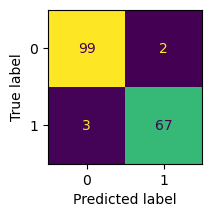

Negative class (Benign) support = 101 
Positive class (Malignant) support = 70
Performance of the model on the test set, focusing on its ability to correctly classify the positive class (malignant)
Precision = 0.9710 Recall = 0.9571
F1 score = 0.9640
 ************************************* learning rate = 0.1 and regularization term = 0.0 *************************************
train Accuracy: 0.9899 test Accuracy: 0.9591
Performance measurements on the test set
Confusion Matrix:


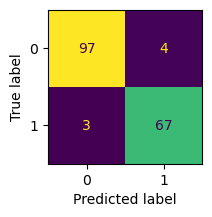

Negative class (Benign) support = 101 
Positive class (Malignant) support = 70
Performance of the model on the test set, focusing on its ability to correctly classify the positive class (malignant)
Precision = 0.9437 Recall = 0.9571
F1 score = 0.9504


In [8]:
""" Create logistic regression model. Use our gradient descent algorithm as alternative optimization methods (defined in P1_definitions as GD_LogReg). """

# Set hyperparameters
Niterations = 10000
eta = np.array([0.0001, 0.001, 0.01, 0.1]) # If you only want one eta value, use array notation anyway, i.e eta = np.array([0.001])
tol = 10e-8
lmb = 0.

# Make predictions with fixed learning rate 
GD_betas = GD_LogReg(X_train_scaled_intercept, GD_y_train, n, n_features, Niterations, eta, lmb, tol)
GD_train_ypredict = Prediction_LogReg(X_train_scaled_intercept, GD_betas)
GD_test_ypredict = Prediction_LogReg(X_test_scaled_intercept, GD_betas)

# Evaluate the performance of the model
for i, etai in enumerate(eta):
    print(' ************************************* learning rate = {} and regularization term = {} *************************************'.format(etai, lmb))
    GD_test_accuracy = accuracy_score(GD_y_test.ravel(), GD_test_ypredict[:,i])
    GD_train_accuracy = accuracy_score(GD_y_train.ravel(), GD_train_ypredict[:,i])
    print(f'train Accuracy: { GD_train_accuracy:.4f}', f'test Accuracy: { GD_test_accuracy:.4f}')
    print('Performance measurements on the test set')
    print('Confusion Matrix:')
    fig, ax = plt.subplots(figsize=(2, 2))
    ConfusionMatrixDisplay.from_predictions(GD_y_test.ravel(), GD_test_ypredict[:,i], ax=ax, colorbar=False)
    plt.show()
    GD_cm = confusion_matrix(GD_y_test.ravel(), GD_test_ypredict[:,i])
    print('Negative class (Benign) support = {} \n'.format(GD_cm[0,0] + GD_cm[0,1]) + 'Positive class (Malignant) support = {}'.format(GD_cm[1,0] + GD_cm[1,1]))
    print('Performance of the model on the test set, focusing on its ability to correctly classify the positive class (malignant)')
    print('Precision = {:.4f}'.format(precision_score(GD_y_test.ravel(),GD_test_ypredict[:,i])), 'Recall = {:.4f}'.format(recall_score(GD_y_test.ravel(),GD_test_ypredict[:,i])))
    print('F1 score = {:.4f}'.format(f1_score(GD_y_test.ravel(),GD_test_ypredict[:,i])))


******************************************************************** MODEL WITH STOCHASTIC GRADIENT DESCENT ********************************************************************

 ************************************* Size of minibatch = 8 and regularization term = 0.1 *************************************
train Accuracy: 0.9849 test Accuracy: 0.9766
Performance measurements on the test set
Confusion Matrix:


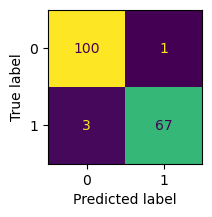

Negative class (Benign) support = 101 
Positive class (Malignant) support = 70
Performance of the model on the test set, focusing on its ability to correctly classify the positive class (malignant)
Precision = 0.9853 Recall = 0.9571
F1 score = 0.9710


In [9]:
""" Create logistic regression model. Use our stochastic gradient descent algorithm as alternative optimization methods (defined in P1_definitions as SGD_LogReg). """


# Set hyperparameters
vector_n_epochs = 500
M = np.array([8]) # np.array([4, 8, 16, 32])       # Size of each minibatch # If you only want one M value, use array notation anyway, i.e M = np.array([8])
m = np.asarray(n/M, dtype = 'int')      # Number of minibatches
t0, t1 = 50, 50      # Learning rate terms
lmb = 0.1      # Regularization parameter 

# Make predictions
SGD_betas = SGD_LogReg(X_train_scaled_intercept, GD_y_train, n_features, t0, t1, M, m, vector_n_epochs, lmb)
SGD_train_ypredict = Prediction_LogReg(X_train_scaled_intercept, SGD_betas)
SGD_test_ypredict = Prediction_LogReg(X_test_scaled_intercept, SGD_betas)
        
# Evaluate the performance of the model
for i, Mi in enumerate(M):
    print(' ************************************* Size of minibatch = {} and regularization term = {} *************************************'.format(Mi, lmb))
    SGD_test_accuracy = accuracy_score(GD_y_test.ravel(), SGD_test_ypredict[:,i])
    SGD_train_accuracy = accuracy_score(GD_y_train.ravel(), SGD_train_ypredict[:,i])
    print(f'train Accuracy: { SGD_train_accuracy:.4f}', f'test Accuracy: { SGD_test_accuracy:.4f}')
    print('Performance measurements on the test set')
    print('Confusion Matrix:')
    fig, ax = plt.subplots(figsize=(2, 2))
    ConfusionMatrixDisplay.from_predictions(GD_y_test.ravel(), SGD_test_ypredict[:,i], ax=ax, colorbar=False)
    plt.show()
    SGD_cm = confusion_matrix(GD_y_test.ravel(), SGD_test_ypredict[:,i])
    print('Negative class (Benign) support = {} \n'.format(SGD_cm[0,0] + SGD_cm[0,1]) + 'Positive class (Malignant) support = {}'.format(SGD_cm[1,0] + SGD_cm[1,1]))
    print('Performance of the model on the test set, focusing on its ability to correctly classify the positive class (malignant)')
    print('Precision = {:.4f}'.format(precision_score(GD_y_test.ravel(), SGD_test_ypredict[:,i])), 'Recall = {:.4f}'.format(recall_score(GD_y_test.ravel(), SGD_test_ypredict[:,i])))
    print('F1 score = {:.4f}'.format(f1_score(GD_y_test.ravel(), SGD_test_ypredict[:,i])))




/Users/chiaragiraudo/Desktop/Codes/P1_definitions.py:708: RuntimeWarning: overflow encountered in power
  yi_tilde = 1.0 / (1.0 + (np.e)**( -xi @ beta))


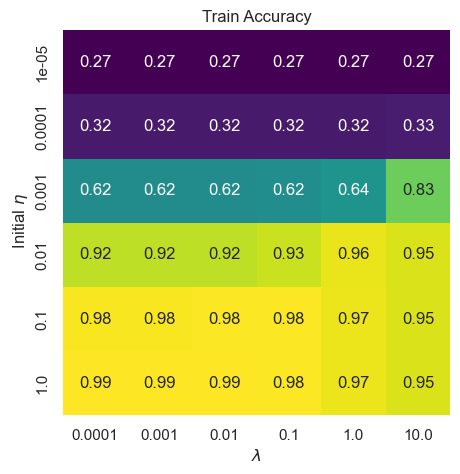

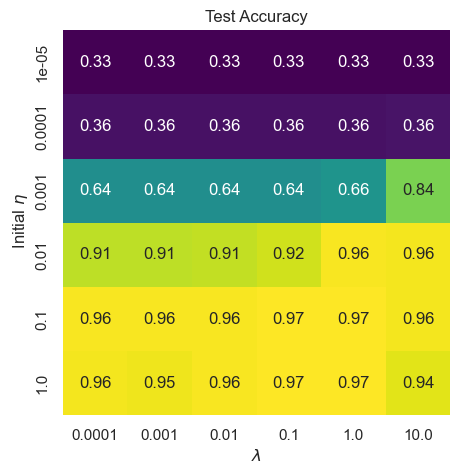

Performance measurements on the test set of the models with eta = 1 and 0.1 
 ************************************* Initial learning rate = 0.1 and lambda = 0.0001 *************************************
train Accuracy: 0.9899 test Accuracy: 0.9591
Performance of the model on the test set, focusing on its ability to correctly classify the positive class (malignant)
Precision = 1.0000 Recall = 0.9718
F1 score = 0.9718
 ************************************* Initial learning rate = 0.1 and lambda = 0.001 *************************************
train Accuracy: 0.9899 test Accuracy: 0.9532
Performance of the model on the test set, focusing on its ability to correctly classify the positive class (malignant)
Precision = 1.0000 Recall = 0.9718
F1 score = 0.9718
 ************************************* Initial learning rate = 0.1 and lambda = 0.01 *************************************
train Accuracy: 0.9874 test Accuracy: 0.9649
Performance of the model on the test set, focusing on its ability to cor

In [10]:
""" CROSS-VALIDATION. Vary starting laerning rate and regularization parameter of the stochastic gradient descent algorithm. """

# Set hyperparameter
vector_n_epochs = 500
M = int(4)    #size of each minibatch
m = int(n/M)     #number of minibatches
lmbd_vals = np.logspace(-4, 1, 6)
# varying t0
t0_val = 5 * np.logspace(-4, 1, 6)
t1_val = 50
eta_vals = t0_val / t1_val

# store the models for later use
train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
precision = np.zeros((len(eta_vals), len(lmbd_vals)))
recall = np.zeros((len(eta_vals), len(lmbd_vals)))
f1 = np.zeros((len(eta_vals), len(lmbd_vals)))

# grid search
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):

        SGD_betas = SGD_LogReg(X_train_scaled_intercept, GD_y_train, n_features, t0_val[i], t1_val, M, m, vector_n_epochs, lmbd)
        train_ypredict = Prediction_LogReg(X_train_scaled_intercept, SGD_betas)
        test_ypredict = Prediction_LogReg(X_test_scaled_intercept, SGD_betas)
        
        # Evaluate the accuracy of the model 
        train_accuracy[i,j] = accuracy_score(GD_y_train, train_ypredict)
        test_accuracy[i,j] = accuracy_score(GD_y_test, test_ypredict)
        # Evaluate precision and recall on the test set 
        precision[i,j] = precision_score(GD_y_train, train_ypredict)
        recall[i,j] = recall_score(GD_y_train, train_ypredict)
        f1[i,j] = recall_score(GD_y_train, train_ypredict)
sns.set()
      
fig, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis", cbar=False, xticklabels= lmbd_vals, yticklabels=eta_vals)
ax.set_title("Train Accuracy")
ax.set_ylabel(" Initial $\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis", cbar=False, xticklabels=lmbd_vals, yticklabels=eta_vals)
ax.set_title("Test Accuracy")
ax.set_ylabel(" Initial $\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

# Evaluate the performance of the models with a higher accuracy on the test set: in this case, eta = 1 and 0.1
print('Performance measurements on the test set of the models with eta = 1 and 0.1 ')
eta_best = np.array([0.1, 1.0])
for eta in eta_best:
    i = 5
    for j, lmbd in enumerate(lmbd_vals):
        print(' ************************************* Initial learning rate = {} and lambda = {} *************************************'.format(eta, lmbd))
        print(f'train Accuracy: { train_accuracy[i,j]:.4f}', f'test Accuracy: { test_accuracy[i,j]:.4f}')
        print('Performance of the model on the test set, focusing on its ability to correctly classify the positive class (malignant)')
        print('Precision = {:.4f}'.format(precision[i,j]), 'Recall = {:.4f}'.format(recall[i,j]))
        print('F1 score = {:.4f}'.format(f1[i,j]))
    i = i + 1
